In [3]:
import os
import sys
import importlib
os.chdir("../..")
directory_path = os.path.abspath(os.path.join("src"))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import EyeTraumaAnalysis

In [4]:
importlib.reload(EyeTraumaAnalysis);

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import cv2

In [46]:
image = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")
# cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image.img, cv2.COLOR_BGR2RGB) # Change color to RGB (from BGR)
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)

In [47]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) #criteria
k = 10 # Choosing number of cluster
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

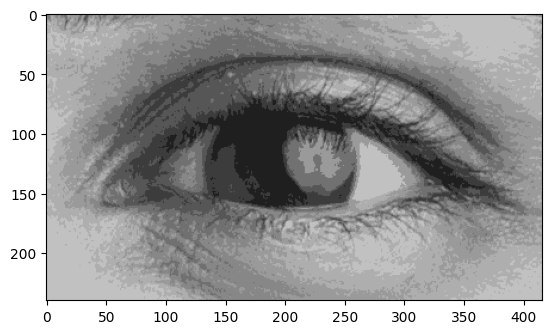

In [50]:
centers = np.uint8(centers) # convert data into 8-bit values
segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)
segmented_image = segmented_data.reshape((image.shape)) # reshape data into the original image dimensions

segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
plt.imshow(segmented_image, cmap='gray', vmin=0, vmax=255)

In [49]:
segmented_image.shape

(240, 416)

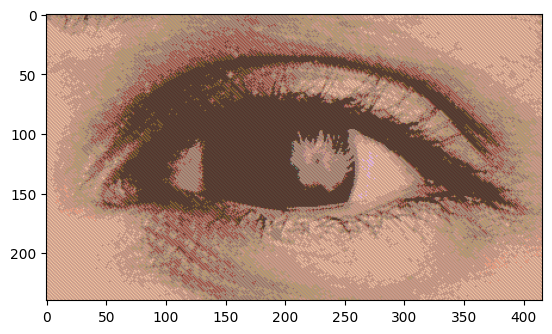

In [51]:
image = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")
img = image.img
# img = cv2.cvtColor(image.img, cv2.COLOR_BGR2GRAY)
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
# res2 = cv2.cvtColor(res2, cv2.COLOR_RGB2GRAY)
plt.imshow(res2, cmap='gray', vmin=0, vmax=255)

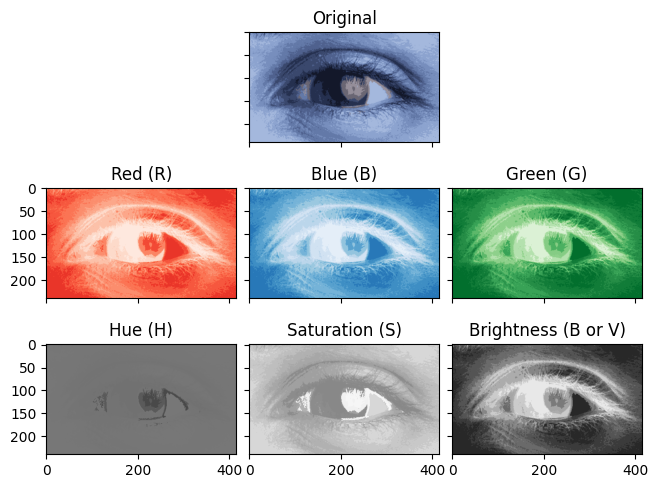

In [17]:
image = segmented_image
img_rgb1 = segmented_image
img_hsv1 = mpl.colors.rgb_to_hsv(img_rgb1[...,:3]/255.0) * 255

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
axs[0,0].axis("off")
axs[0,1].imshow(img_rgb1)
axs[0,1].set_title("Original")
axs[0,2].axis("off")

axs[1,0].imshow(img_rgb1[...,0], vmin=0, vmax=255, cmap="Reds");
axs[1,0].set_title("Red (R)")
axs[1,1].imshow(img_rgb1[...,1], vmin=0, vmax=255, cmap="Blues");
axs[1,1].set_title("Blue (B)")
axs[1,2].imshow(img_rgb1[...,2], vmin=0, vmax=255, cmap="Greens");
axs[1,2].set_title("Green (G)")
axs[2,0].imshow(img_hsv1[...,0], vmin=0, vmax=255, cmap="Greys");
axs[2,0].set_title("Hue (H)")
axs[2,1].imshow(img_hsv1[...,1], vmin=0, vmax=255, cmap="Greys");
axs[2,1].set_title("Saturation (S)")
axs[2,2].imshow(img_hsv1[...,2], vmin=0, vmax=255, cmap="Greys");
axs[2,2].set_title("Brightness (B or V)")

fig.tight_layout(pad=0)

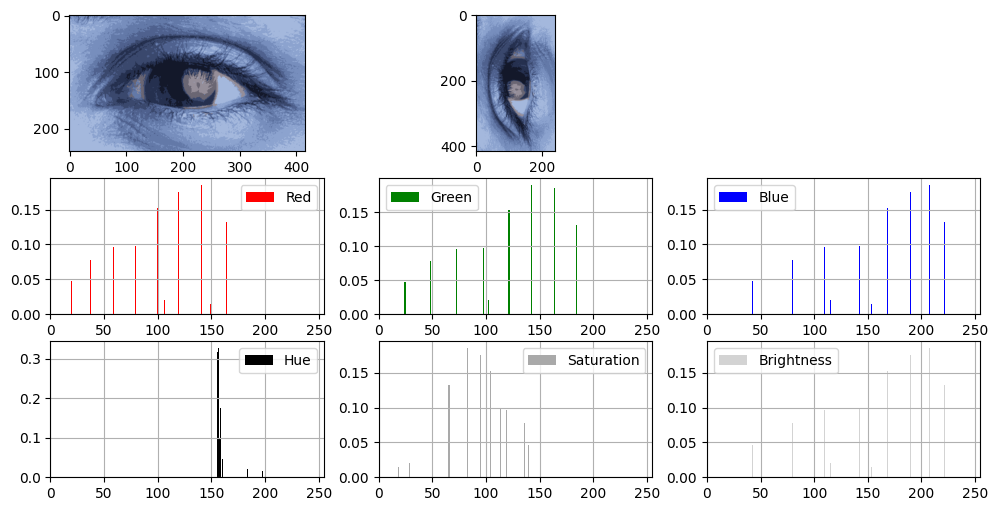

In [21]:
image = segmented_image

img_hsv = mpl.colors.rgb_to_hsv(segmented_image[...,:3]/255.0) * 255

fig, axs = plt.subplots(3, 3, figsize=(12,6))

axs[0,0].imshow(image)

axs[0,1].imshow(np.transpose(segmented_image, axes=[1,0,2]))
axs[0,2].axis("off")

axs[1,0].hist(image[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red");
axs[1,1].hist(image[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green");
axs[1,2].hist(image[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue");

axs[2,0].hist(img_hsv[...,0].ravel(),256,[0,256],density=True, facecolor="black", label="Hue");
axs[2,1].hist(img_hsv[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation");
axs[2,2].hist(img_hsv[...,2].ravel(),256,[0,256],density=True, facecolor="lightgray", label="Brightness");

for ind, ax in enumerate(axs[1:,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()
